In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import matplotlib.pyplot as pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
credits = pd.read_csv('credits.csv')
credits.head(2)

,Unnamed: 0,movie_id,title,cast,crew,cast unpacked
0,0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."


In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
movies = movies.drop(columns = ['homepage', 'id', 'status', 'production_countries', 'spoken_languages', 'original_title','overview'])
movies.head(1000)


,budget,genres,keywords,original_language,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 393, ""name"": ""civil war""}, {""id"": 531,...",en,40.721373,"[{""name"": ""Alcon Entertainment"", ""id"": 1088}, ...",2013-02-13,60052138,124.0,Dark secrets will come to light.,Beautiful Creatures,5.6,984
996,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...","[{""id"": 417, ""name"": ""corruption""}, {""id"": 224...",en,11.329727,"[{""name"": ""Senator Film Produktion"", ""id"": 191...",2002-03-28,0,109.0,Get ready for an unexpected hit.,Death to Smoochy,5.9,132
997,50000000,"[{""id"": 35, ""name"": ""Comedy""}]","[{""id"": 6241, ""name"": ""stupidity""}, {""id"": 966...",en,37.253774,"[{""name"": ""Scott Rudin Productions"", ""id"": 258...",2016-02-06,55969000,100.0,Long time no Z,Zoolander 2,4.7,797
998,50000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...","[{""id"": 612, ""name"": ""hotel""}, {""id"": 642, ""na...",en,6.397388,"[{""name"": ""Shangri-La Entertainment"", ""id"": 22...",2004-01-30,6808550,88.0,It's all in who you trust,The Big Bounce,5.0,76


In [ ]:
movies=movies[movies["original_language"]=='en']
movies

,budget,genres,keywords,original_language,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",[],en,0.022173,[],2005-03-12,0,80.0,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],[],en,0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7


In [ ]:
movies = movies.drop(columns = ['original_language'])
movies.head()


,budget,genres,keywords,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
def convert_json(json):
    items = []
    for i in json:
        items.append(i['name'])
    return items


In [ ]:
def convert_json_char(json):
    items = []
    for i in json:
        items.append(i['character'])
    return items


In [ ]:
movies['genres unpacked'] = [ast.literal_eval(x) for x in movies['genres']]
movies['genres unpacked'] = movies['genres unpacked'].apply(convert_json)
movies

,budget,genres,keywords,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",[],0.022173,[],2005-03-12,0,80.0,NaN,Cavite,7.5,2,"[Foreign, Thriller]"
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]"
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]"
4801,0,[],[],0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[]


In [ ]:
movies = movies.drop(columns = ['genres'])
movies.head()

,budget,keywords,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked
0,237000000,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


In [ ]:
movies['production_companies_unpacked'] = [ast.literal_eval(x) for x in movies['production_companies']]
movies['production_companies_unpacked'] = movies['production_companies_unpacked'].apply(convert_json)
movies

,budget,keywords,popularity,production_companies,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked
0,237000000,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo..."
1,300000000,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,245000000,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]"
3,250000000,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai..."
4,260000000,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,[],0.022173,[],2005-03-12,0,80.0,NaN,Cavite,7.5,2,"[Foreign, Thriller]",[]
4799,9000,[],0.642552,[],2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]",[]
4800,0,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]","[Front Street Pictures, Muse Entertainment Ent..."
4801,0,[],0.857008,[],2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[],[]


In [ ]:
movies = movies.drop(columns = ['production_companies'])
movies.head()

,budget,keywords,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked
0,237000000,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo..."
1,300000000,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,245000000,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]"
3,250000000,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai..."
4,260000000,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures]


In [ ]:
movies['keywords_unpacked'] = [ast.literal_eval(x) for x in movies['keywords']]
movies['keywords_unpacked'] = movies['keywords_unpacked'].apply(convert_json)
movies = movies.drop(columns = ['keywords'])
movies

,budget,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked,keywords_unpacked
0,237000000,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[culture clash, future, space war, space colon..."
1,300000000,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...","[ocean, drug abuse, exotic island, east india ..."
2,245000000,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[spy, based on novel, secret agent, sequel, mi..."
3,250000000,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...","[dc comics, crime fighter, terrorist, secret i..."
4,260000000,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],"[based on novel, mars, medallion, space travel..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,0.022173,2005-03-12,0,80.0,NaN,Cavite,7.5,2,"[Foreign, Thriller]",[],[]
4799,9000,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]",[],[]
4800,0,1.444476,2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]","[Front Street Pictures, Muse Entertainment Ent...","[date, love at first sight, narration, investi..."
4801,0,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[],[],[]


In [ ]:
credits

,Unnamed: 0,movie_id,title,cast,crew,cast unpacked
0,0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."
...,...,...,...,...,...,...
4798,4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M..."
4799,4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...","['Edward Burns', 'Kerry Bishé', 'Marsha Dietle..."
4800,4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe..."
4801,4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...","['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'..."


In [ ]:
credits = credits.drop(columns = ['cast', 'crew','Unnamed: 0','movie_id'])
credits.head()

,title,cast unpacked
0,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."


In [ ]:
joined_dataset=movies.merge(credits,on='title')
joined_dataset

,budget,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked,keywords_unpacked,cast unpacked
0,237000000,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[culture clash, future, space war, space colon...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,300000000,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...","[ocean, drug abuse, exotic island, east india ...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,245000000,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[spy, based on novel, secret agent, sequel, mi...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,250000000,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...","[dc comics, crime fighter, terrorist, secret i...","['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,260000000,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],"[based on novel, mars, medallion, space travel...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,0,0.022173,2005-03-12,0,80.0,NaN,Cavite,7.5,2,"[Foreign, Thriller]",[],[],[]
4506,9000,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]",[],[],"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle..."
4507,0,1.444476,2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]","[Front Street Pictures, Muse Entertainment Ent...","[date, love at first sight, narration, investi...","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe..."
4508,0,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[],[],[],"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'..."


In [ ]:
joined_dataset['release_date'] = pd.to_datetime(joined_dataset['release_date'])
joined_dataset

,budget,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked,keywords_unpacked,cast unpacked
0,237000000,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[culture clash, future, space war, space colon...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,300000000,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...","[ocean, drug abuse, exotic island, east india ...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,245000000,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[spy, based on novel, secret agent, sequel, mi...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,250000000,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...","[dc comics, crime fighter, terrorist, secret i...","['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,260000000,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],"[based on novel, mars, medallion, space travel...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,0,0.022173,2005-03-12,0,80.0,NaN,Cavite,7.5,2,"[Foreign, Thriller]",[],[],[]
4506,9000,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Comedy, Romance]",[],[],"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle..."
4507,0,1.444476,2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,"[Comedy, Drama, Romance, TV Movie]","[Front Street Pictures, Muse Entertainment Ent...","[date, love at first sight, narration, investi...","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe..."
4508,0,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,[],[],[],"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'..."


In [ ]:
joined_dataset['release_year']= joined_dataset["release_date"].dt.year
joined_dataset= joined_dataset.drop(columns = ['release_date'])
joined_dataset.head(10)

,budget,popularity,revenue,runtime,tagline,title,vote_average,vote_count,genres unpacked,production_companies_unpacked,keywords_unpacked,cast unpacked,release_year
0,237000000,150.437577,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[culture clash, future, space war, space colon...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",2009.0
1,300000000,139.082615,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...","[ocean, drug abuse, exotic island, east india ...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",2007.0
2,245000000,107.376788,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[spy, based on novel, secret agent, sequel, mi...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",2015.0
3,250000000,112.312950,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...","[dc comics, crime fighter, terrorist, secret i...","['Christian Bale', 'Michael Caine', 'Gary Oldm...",2012.0
4,260000000,43.926995,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],"[based on novel, mars, medallion, space travel...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",2012.0
5,258000000,115.699814,890871626,139.0,The battle within.,Spider-Man 3,5.9,3576,"[Fantasy, Action, Adventure]","[Columbia Pictures, Laura Ziskin Productions, ...","[dual identity, amnesia, sandstorm, love of on...","['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",2007.0
6,260000000,48.681969,591794936,100.0,They're taking adventure to new lengths.,Tangled,7.4,3330,"[Animation, Family]","[Walt Disney Pictures, Walt Disney Animation S...","[hostage, magic, horse, fairy tale, musical, p...","['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",2010.0
7,280000000,134.279229,1405403694,141.0,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Action, Adventure, Science Fiction]","[Marvel Studios, Prime Focus, Revolution Sun S...","[marvel comic, sequel, superhero, based on com...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",2015.0
8,250000000,98.885637,933959197,153.0,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,"[Adventure, Fantasy, Family]","[Warner Bros., Heyday Films]","[witch, magic, broom, school of witchcraft, wi...","['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",2009.0
9,250000000,155.790452,873260194,151.0,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,"[Action, Adventure, Fantasy]","[DC Comics, Atlas Entertainment, Warner Bros.,...","[dc comics, vigilante, superhero, based on com...","['Ben Affleck', 'Henry Cavill', 'Gal Gadot', '...",2016.0


In [ ]:
grouped_dataset = joined_dataset.groupby('release_year').size()
grouped_dataset

release_year
1916.0      1
1925.0      1
1929.0      1
1930.0      1
1932.0      1
         ... 
2013.0    210
2014.0    222
2015.0    197
2016.0     97
2017.0      1
Length: 89, dtype: int64

In [ ]:
release_years= sorted(joined_dataset['release_year'].unique())
del release_years[-1]

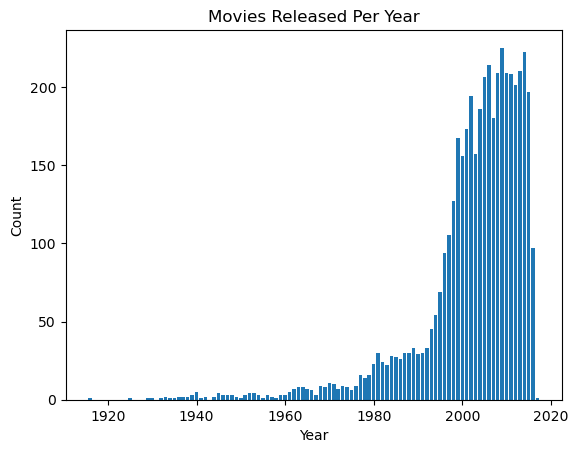

In [ ]:
plt.bar(release_years,height = grouped_dataset)
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count");

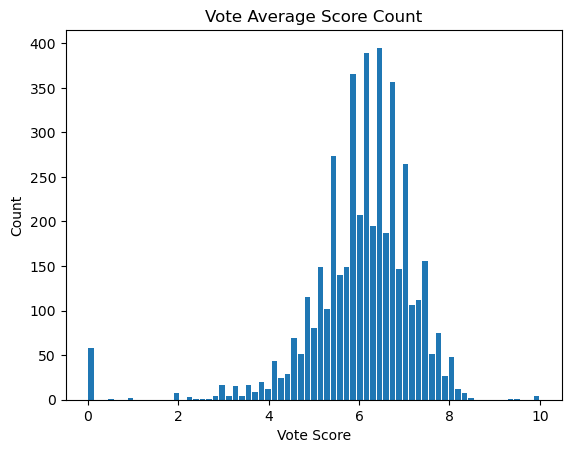

In [ ]:
plt.hist(x = joined_dataset['vote_average'], bins = 'auto', rwidth = 0.85)
plt.title("Vote Average Score Count")
plt.xlabel("Vote Score")
plt.ylabel("Count");

In [ ]:
genres = joined_dataset['genres unpacked']
firsts = []
for i in genres:
  if len(i) > 0:
    first = i[0]
    firsts = np.append(firsts, first)
genres_df = pd.DataFrame(pd.value_counts(firsts)).reset_index()
count_genres = genres_df["count"]
genre_axis = genres_df['index']

/var/folders/31/gjl12q7d0bs02gcv2n1xgxym0000gp/T/ipykernel_12681/2686504151.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  genres_df = pd.DataFrame(pd.value_counts(firsts)).reset_index()


Text(0, 0.5, 'Genre')

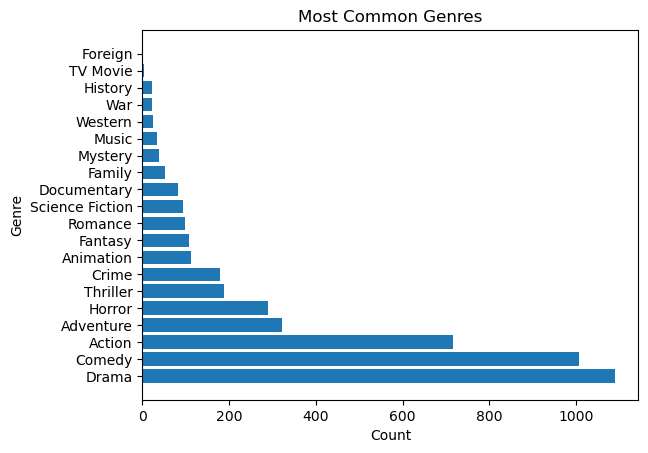

In [ ]:
plt.barh(y = genre_axis, width = count_genres)
plt.title("Most Common Genres")
plt.xlabel('Count')
plt.ylabel('Genre')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
joined_dataset['tagline'] = joined_dataset['tagline'].fillna('')
tfidf_matrix = tfidf.fit_transform(joined_dataset['tagline'])

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_s = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(joined_dataset.index, index=joined_dataset['title']).drop_duplicates()

In [ ]:

def recommendations(title, cosine_sim=cosine_s):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:20]
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return joined_dataset['title'].iloc[movie_indices]


In [ ]:
pd.DataFrame(recommendations("Avatar")).reset_index().drop(columns = 'index')

,title
0,The Cell
1,Scarface
2,We Are Your Friends
3,Mad Max Beyond Thunderdome
4,A Perfect Getaway
5,Darkness
6,Lara Croft Tomb Raider: The Cradle of Life
7,Transformers
8,The Silence of the Lambs
9,Max Keeble's Big Move
